In [ ]:
import sys
from pathlib import Path
import os
import matplotlib.pyplot as plt

# set fungerande katalog till projekt root

Root = Path.cwd().parent  # notebook, i projekt root/src 
os.chdir(Root)

# Add src folder till path

src = Root / "src"
sys.path.append(str(src))

# Import modules

import metrics
from diagrams import plot_revenue_by_category, plot_revenue_by_city, plot_revenue_over_time 

# använd df från metrics.py

df = metrics.df  # metrics.py redan laddat CVC


In [29]:
# 1. totala intäkt, total units, antal ardrar, AOV

total_reveneune = df["revenue"].sum()
total_units = df["units"].sum()
orders = df.groupby("order_id")["revenue"].sum()
aov = orders.mean()

# 2. intäkter per kategori / stad 

rev_cat = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
rev_city = df.groupby("city")["revenue"].sum().sort_values(ascending=False)

# 3. top-3 kategorier 

top3 = rev_cat.head(3)

# 4. Försäljning över tid (månad)

monthly = df.set_index("date")["revenue"].resample("M").sum()

# skriv ut KPIer 

print(f"Totalt intäkt: {total_reveneune:,.2f} kr")
print(f"Totalt antal enhete: {total_units} ")
print(f"Antal ordrar: {len(orders)}")
print(f"AOV ( Averege Order Value): {aov:,.2f} kr")

print("\nTop3 kategorier:")
print(top3)

print("\nTop5 städer:")
print(rev_city.head())



Totalt intäkt: 3,502,767.23 kr
Totalt antal enhete: 7463 
Antal ordrar: 2500
AOV ( Averege Order Value): 1,401.11 kr

Top3 kategorier:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64

Top5 städer:
city
Stockholm    1227201.94
Göteborg      859019.65
Malmö         567926.32
Uppsala       551478.42
Västerås      297140.90
Name: revenue, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13844\2876671535.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("date")["revenue"].resample("M").sum()


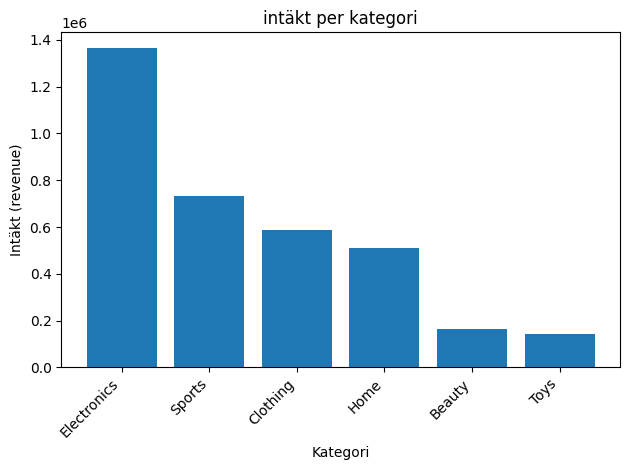

c:\Users\Lenovo\Documents\GitHub\ecommerce-analytics\src\diagrams.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(freq=freq))["revenue"]


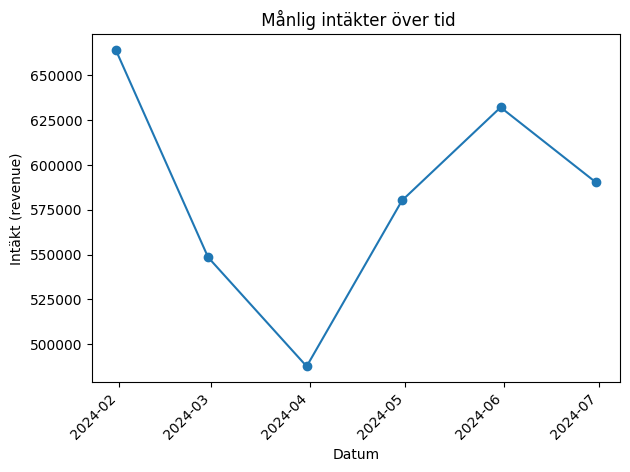


Avvikande dagar (z > 3):
date
2024-02-26    4.072075
2024-04-09    3.141552
Name: revenue, dtype: float64


In [30]:
# figur 1 intäkt per kategori 

plot_revenue_by_category(df)
plt.title("intäkt per kategori")
plt.show()

# figur 2 intäkt över tid 

plot_revenue_over_time(df, freq = "M")
plt.title(" Månlig intäkter över tid")
plt.show()

# Avikelser (z score z > 3)

daily = df.set_index("date")["revenue"].resample("D").sum()
z = (daily - daily.mean()) / daily.std()
anoms = z[abs(z) > 3]

print("\nAvvikande dagar (z > 3):")
print(anoms if len(anoms) else "inga tydliga avvikelser")

